# Feature Selection: Remote Sensing Indices

### Data Dictionary

| Index | Features | Full Name | IDB # | Used Sent Hub Variables |
|-|-|-|-|-|
| 0 | blue | Band 2 (10m) | n/a |  |
| 1 | green | Band 3 (10m) | n/a |  |
| 2 | red | Band 4 (10m) | n/a |  |
| 3 | nir | Band 8 (10m) | n/a |  |
| 4 | red_edge1 | Band 5 (20m) | n/a |  |
| 5 | red_edge2 | Band 6 (20m) | n/a |  |
| 6 | red_edge3 | Band 7 (20m) | n/a |  |
| 7 | narrow_nir | Band 8a? (20m) | n/a |  |
| 8 | swir1 | Band 11 (20m) | n/a |  |
| 9 | swir2 | Band 12 (20m) | n/a |  |
| 10 | ndvi | Normalized Difference NIR/Red Normalized Difference Vegetation Index, Calibrated NDVI - CDVI | #67 | N |
| 11 | atsavi | Adjusted transformed soil-adjusted VI | #1 | N |
| 12 | arvi | Atmospherically Resistant Vegetation Index | #5 | Y |
| 13 | arvi2 | Atmospherically Resistant Vegetation Index 2 | #6 | N |
| 14 | bwdrvi | Blue-wide dynamic range vegetation index | #7 | N |
| 15 | ccci | Canopy Chlorophyll Content Index | #9 | N |
| 16 | chl_green | Chlorophyll Green | #12 | N |
| 17 | ci_green | Chlorophyll Index Green | #13 | N |
| 18 | ci_rededge | Chlorophyll IndexRedEdge | #14 | N |
| 19 | chl_rededge | Chlorophyll Red-Edge | #15 | N |
| 20 | cvi | Chlorophyll vegetation index | #16 | N |
| 21 | ci | Coloration Index | #17 | N |
| 22 | ctvi | Corrected Transformed Vegetation Index | #18 | N |
| 23 | gdvi | Difference NIR/Green Green Difference Vegetation Index | #24 | N |
| 24 | evi | Enhanced Vegetation Index | #25 | N |
| 25 | gemi | Global Environment Monitoring Index | #26 | N (from IDB) |
| 26 | gli | Green leaf index | #27 | N |
| 27 | gndvi | Green Normalized Difference Vegetation Index | #28 | N |
| 28 | gosavi | Green Optimized Soil Adjusted Vegetation Index | #29 | N |
| 29 | gsavi | Green Soil Adjusted Vegetation Index | #30 | N (from IDB) |
| 30 | gbndvi | Green-Blue NDVI | #31 | N |
| 31 | grndvi | Green-Red NDVI | #32 | N |
| 32 | hue | Hue | #33 | N |
| 33 | ivi | Ideal vegetation index | #34 | Y |
| 34 | ipvi | Infrared percentage vegetation index | #35 | N |
| 35 | intensity | Intensity | #36 | N  |
| 36 | lwci | Leaf Water Content Index | #38 | Y |
| 37 | msavi2 | Modified Soil Adjusted Vegetation Index (referred to as msavi) | #46 | N |
| 38 | normg | Norm G | #50 | N |
| 39 | normnir | Norm NIR | #51 | N |
| 40 | normr | Norm R | #52 | N |
| 41 | ndmi | Normalized Difference 820/1600 Normalized Difference Moisture Index | #61 | N |
| 42 | ngrdi | Normalized Difference Green/Red Normalized green red difference index, Visible Atmospherically Resistant Indices Green (VIgreen) | #62 | N |
| 43 | ndvi_ad | Normalized Difference MIR/NIR Normalized Difference Vegetation Index (in case of strong atmospheric disturbances) | #63 | N |
| 44 | bndvi | Normalized Difference NIR/Blue Blue-normalized difference vegetation index | #64 | N |
| 45 | mndvi | Normalized Difference NIR/MIR Modified Normalized Difference Vegetation Index | #66 | N |
| 46 | nbr | Normalized Difference NIR/SWIR Normalized Burn Ratio | #68 | N |
| 47 | ri | Normalized Difference Red/Green Redness Index | #69 | N |
| 48 | ndvi690_710 | Normalized Difference Vegetation Index 690-710 | #70 | N |
| 49 | pndvi | Pan NDVI | #72 | N |
| 50 | pvi | Perpendicular Vegetation Index | #73 | Y |
| 51 | rbndvi | Red-Blue NDVI | #81 | N |
| 52 | rsr | Reduced Simple Ratio | #85 | Y |
| 53 | rdi | Simple Ratio MIR/NIR Ratio Drought Index | #110 | N |
| 54 | srnir | Simple Ratio NIR/700-715 | #111 | N |
| 55 | grvi | Simple Ratio NIR/G Green Ratio Vegetation Index | #112 | N |
| 56 | dvi | Simple Ratio NIR/RED Difference Vegetation Index, Vegetation Index Number (VIN) | #113 | N |
| 57 | slavi | Specific Leaf Area Vegetation Index | #129 | N |
| 58 | gvi | Tasselled Cap - vegetation | #133 | N |
| 59 | wet | Tasselled Cap - wetness | #134 | N |
| 60 | tsavi | Transformed Soil Adjusted Vegetation Index | #135 | Y |
| 61 | tvi | Transformed Vegetation Index | #136 | N |
| 62 | vari_rededge | Visible Atmospherically Resistant Indices RedEdge | #138 | N |
| 63 | wdvi | Weighted Difference Vegetation Index | #139 | Y |
| 64 | bsi | Bare Soil Index | n/a | n/a |

In [1]:
import pandas as pd
import numpy as np
import hickle as hkl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance

### Load and trim data

In [2]:
train_x = hkl.load('data/train/train_x.hkl')
train_y = hkl.load('data/train/train_y.hkl')
test_x = hkl.load('data/test/test_x.hkl') 
test_y = hkl.load('data/test/test_y.hkl') 

# utilize only yearly median time step 
train_x = train_x[:, -1,...]
test_x = test_x[:, -1, ...]

# utilize only bands, removing RS indices and trim pixels to match labels
train_x = train_x[:, 5:-5, 5:-5, :10]
test_x = test_x[:, 5:-5, 5:-5, :10]

train_x.shape, test_x.shape

#print the max, min, np.percentile(75) - np.percentile(25)

((5468, 14, 14, 10), (1025, 14, 14, 10))

### Calculate RS Indices
assumptions*

In [3]:
def calc_indices(arr):
    
    '''
    Takes in an array of 10 and 20m sentinel-2 bands as input and 
    calculates 55 remote sensing indices. Returns indices 
    as a combined ndarray.
    '''
    
    # define bands
    blue = arr[...,0]
    green = arr[...,1] 
    red = arr[...,2]
    nir = arr[...,3] 
    red_edge1 = arr[...,4] 
    red_edge2 = arr[...,5]
    red_edge3 = arr[...,6] 
    narrow_nir = arr[...,7] 
    swir1 = arr[...,8]
    swir2 = arr[...,9]
    
    # calculate RS indices
    ndvi = (nir-red) / (nir+red)  
    
    atsavi = 1.22*((nir-1.22*red-0.03) / (1.22*nir+red-1.22*0.03+0.08*(1+1.22**2)))

    arvi = (nir-red-0.069*(red-blue)) / (nir+red-0.069*(red-blue)) 
     
    arvi2 = (-0.18+1.17)*ndvi
     
    bwdrvi = (0.1*nir-blue) / (0.1*nir+blue)
    
    ccci = ((nir-red_edge1) / (nir+red_edge1)) / ((nir-red_edge1) / (nir+red_edge1)) 
     
    chl_green = (red_edge3/green)**-1 
    
    ci_green = (nir/green)*-1 
    
    ci_rededge = (nir/red_edge1)*-1 
    
    chl_rededge = (red_edge3/red_edge1)**-1 
     
    cvi = nir*(red/green**2) 
    
    ci = (red-blue) / red 
    
    ctvi = ((ndvi+0.5) / np.abs((ndvi)+0.5))*np.sqrt(np.abs(ndvi+0.5))
     
    gdvi = nir-green 
    
    evi = 2.5*((nir-red) / ((nir+6*red-7.5*blue)+1)) 
    
    def global_env_mon_index(nir, red):
        n = (2*(nir**2-red**2)+1.5*nir+0.5*red) / (nir+red+0.5)
        gemi = (n*(1-0.25*n)-((red-0.125) / (1-red))) 
        return gemi
        
    gemi = global_env_mon_index(nir, red) 
    
    gli = (2*green-red-blue) / (2*green+red+blue) 
    
    gndvi = (nir-green) / (nir+green) 
    
    gosavi = (nir-green) / (nir+green+0.16) 
    
    gsavi = ((nir-green) / (nir+green+0.5))*(1+0.5) 
    
    gbndvi = (nir-(green+blue)) / (nir+(green+blue)) 
    
    grndvi = (nir-(green+red)) / (nir+(green+red)) 
    
    hue = np.arctan(((2*red-green-blue) / 30.5)*(green-blue)) 
    
    ivi = (nir-0.809) / (0.393*red) 
    
    ipvi = ((nir / nir+red)/2)*(ndvi+1) 
    
    intensity = (1/30.5)*(red+green+blue) 
    
    lwci = np.log(1.0-(nir-0.101)) / (-np.log(1.0-(nir-0.101)))
        
    msavi2 = (2*nir+1 - np.sqrt(np.abs((2*nir+1)**2-8*(nir-red)))) / 2 
        
    normg = green / (nir+red+green) 
    
    normnir = nir / (nir+red+green)
    
    normr = red / (nir+red+green)
    
    ndmi = (nir-swir1) / (nir+swir1) 
    
    ngrdi = (green-red) / (green+red)
    
    ndvi_ad = (swir2-nir) / (swir2+nir)  
    
    bndvi = (nir-blue) / (nir+blue) 
        
    mndvi = (nir-swir2) / (nir+swir2) 

    nbr = (nir-swir2) / (nir+swir2) 
    
    ri = (red-green) / (red+green) 
    
    ndvi690_710 = (nir-red_edge1) / (nir+red_edge1) 
    
    pndvi = (nir-(green+red+blue)) / (nir+(green+red+blue)) 
    
    pvi = (1 / np.sqrt(0.149**2+1)) * (nir-0.374-0.735) 
    
    rbndvi = (nir-(red+blue)) / (nir+(red+blue)) 
    
    rsr = (nir / red)*0.640-(swir2 / 0.640)-0.259 
        
    rdi = (swir2 / nir) 
    
    srnir = (nir / red_edge1)
    
    grvi = (nir / green) 
    
    dvi = (nir / red) 
    
    slavi = (nir / (red_edge1+swir2))
        
    gvi = (-0.2848*blue-0.2435*green-0.5436*red+0.7243*nir+0.0840*swir1-0.1800*swir2)
    
    wet = (0.1509*blue+0.1973*green+0.3279*red+0.3406*nir-0.7112*swir1-0.4572*swir2) 
    
    tsavi = (0.421*(nir-0.421*red-0.824)) / (red+0.421*(nir-0.824)+0.114*(1+0.421**2)) 
    
    tvi = np.sqrt(np.abs(ndvi+0.5)) 
    
    vari_rededge = (red_edge1-red) / (red_edge1+red)
    
    wdvi = (nir-0.752*red) 
    
    bsi = (swir1+red)-(nir+blue) / (swir1+red)+(nir+blue) 
        
    full_list = [ndvi, atsavi, arvi, arvi2, bwdrvi, ccci, chl_green, ci_green, 
               ci_rededge, chl_rededge, cvi, ci, ctvi, gdvi, evi, gemi, gli, 
               gndvi, gosavi, gsavi, gbndvi, grndvi, hue, ivi, ipvi, intensity, 
               lwci, msavi2, normg, normnir, normr, ndmi, ngrdi, ndvi_ad, bndvi, 
               mndvi, nbr, ri, ndvi690_710, pndvi, pvi, rbndvi, rsr, rdi, srnir, 
               grvi, dvi, slavi, gvi, wet, tsavi, tvi, vari_rededge, wdvi, bsi]
    
    gs_5 = [evi, msavi2, ndvi, ndmi, bsi] # RS indices for gridsearch
    
    rs_indices = np.empty((arr.shape[0], arr.shape[1], arr.shape[2], len(full_list)), dtype=np.float32)
    gs_indices = np.empty((arr.shape[0], arr.shape[1], arr.shape[2], len(gs_5)), dtype=np.float32)
    
    for i, v in enumerate(full_list):
        rs_indices[..., i] = v
    
    for i, v in enumerate(gs_5):
        gs_indices[..., i] = v
    
    return gs_indices, rs_indices
   

In [4]:
gs_indices_train, rs_indices_train = calc_indices(train_x)
gs_indices_test, rs_indices_test = calc_indices(test_x)

### Combine, scale, reshape

In [22]:
# combine RS indices with train/test data
train_x_rs = np.empty((5468, 14, 14, 65), dtype=np.float32)
test_x_rs = np.empty((1025, 14, 14, 65), dtype=np.float32)

train_x_rs[..., :10] = train_x
train_x_rs[..., 10:] = rs_indices_train

test_x_rs[..., :10] = test_x
test_x_rs[..., 10:] = rs_indices_test

train_x_rs.shape, test_x_rs.shape

In [8]:
# standardize train/test data 
min_all = []
max_all = []

for band in range(0, train_x_rs.shape[-1]):
    
    mins = np.percentile(train_x_rs[..., band], 1)
    maxs = np.percentile(train_x_rs[..., band], 99)
    
    if maxs > mins:
        
        # clip values in each band based on min/max 
        train_x_rs[..., band] = np.clip(train_x_rs[..., band], mins, maxs)
        test_x_rs[..., band] = np.clip(test_x_rs[..., band], mins, maxs)

        #calculate standardized data
        midrange = (maxs + mins) / 2
        rng = maxs - mins
        standardized_train = (train_x_rs[..., band] - midrange) / (rng / 2)
        standardized_test = (test_x_rs[..., band] - midrange) / (rng / 2)

        # update train_x_rs and test_x_rs to standardized data
        train_x_rs[..., band] = standardized_train
        test_x_rs[..., band] = standardized_test

        min_all.append(mins)
        max_all.append(maxs)
    else:
        pass
    
print(f"The data has been scaled to {np.min(train_x_rs)}, {np.max(train_x_rs)}")

The data has been scaled to -1.0000001192092896, 1.0000001192092896


In [9]:
# reshape train/test data
train_x = np.reshape(train_x_rs, (train_x_rs.shape[0]*train_x_rs.shape[1]*train_x_rs.shape[2], train_x_rs.shape[-1]))
train_y = np.reshape(train_y, (train_y.shape[0]*train_y.shape[1]*train_y.shape[2]))
test_x = np.reshape(test_x_rs, (test_x_rs.shape[0]*test_x_rs.shape[1]*test_x_rs.shape[2], test_x_rs.shape[-1]))
test_y = np.reshape(test_y, (test_y.shape[0]*test_y.shape[1]*test_y.shape[2]))

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1071728, 65), (1071728,), (200900, 65), (200900,))

### Random Search 
Use random search over 50 difference combinations to narrow down the set of hyperparameters used in grid search.

In [ ]:
rfr = RandomForestRegressor(random_state=42)

rds_params = {'max_depth': list(np.linspace(10, 1000, 10, dtype=int)) + [None],  
              'max_features': ['auto',5,10], 
              'max_leaf_nodes': [5,10,20,None], 
              'max_samples': [5,10,None], 
              'min_impurity_decrease': [0.0,0.01,0.05],
              'min_samples_leaf': [1,2,3,4], 
              'min_samples_split': [2,5,10], 
              'n_estimators': [200,300,400,500,600]} 

rds = RandomizedSearchCV(estimator=rfr,
                        param_distributions=rds_params, 
                        n_iter=50,
                        cv=3, 
                        n_jobs=-1,
                        verbose=10)
 
rds.fit(train_x, train_y)
rds_best = rds.best_params_
rds_best

```
{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 10,
 'max_depth': 890}
```

In [69]:
# evaluate and compare with baseline

def evaluate(model, test_x, test_y):
    y_pred = model.predict(test_x)
    return print(f'MSE: {mean_squared_error(test_y, y_pred)}')

evaluate(rds.best_estimator_, test_x, test_y)

MSE: 0.10441007566366331


In [70]:
base_rfr = RandomForestRegressor(n_estimators=10, random_state=42)
base_rfr.fit(train_x, train_y)
evaluate(base_rfr, test_x, test_y)

MSE: 0.11524226764063511


In [ ]:
plot_ids = np.arange(1, 50)

def bootstrap(plot_ids, n = 10000):
    
    # precision, recall, f1
    array = np.empty((3, n))
    for sample in range(n):
        resample = np.random.sample(plot_ids.shape, reuse = True)
        # 1, 5, 4, 1 12
        plot_ids = plot_ids[resample]
        
        p, r, f1 = calculate_metrics(plot_ids)
        array[..., sample] = p, r, f1
        
    
    p_lower, r_lower, f1_lower = np.percentile(2.5, array)
    p_upper, r_upper, f1_upper = np.percentile(97.5, array)
    
    
    


### Grid Search
Using the results of the Random Search, spot check the combinations that are known to perform well by hyperparameter tuning to a subset of the data (10 Sentinel 2 bands and 5 of the RS indices: evi, msavi2, ndvi, ndmi, bsi).

In [33]:
# combine gs indices with train/test data
train_x_gs = np.empty((5468, 14, 14, 15), dtype=np.float32)
test_x_gs = np.empty((1025, 14, 14, 15), dtype=np.float32)

train_x_gs[..., :10] = train_x
train_x_gs[..., 10:] = gs_indices_train

test_x_gs[..., :10] = test_x
test_x_gs[..., 10:] = gs_indices_test

train_x_gs.shape, test_x_gs.shape

((5468, 14, 14, 15), (1025, 14, 14, 15))

In [34]:
# standardize train/test data 
min_all = []
max_all = []

for band in range(0, train_x_gs.shape[-1]):
    
    mins = np.percentile(train_x_gs[..., band], 1)
    maxs = np.percentile(train_x_gs[..., band], 99)
    
    if maxs > mins:
        
        # clip values in each band based on min/max 
        train_x_gs[..., band] = np.clip(train_x_gs[..., band], mins, maxs)
        test_x_gs[..., band] = np.clip(test_x_gs[..., band], mins, maxs)

        # calculate standardized data
        midrange = (maxs + mins) / 2
        rng = maxs - mins
        standardized_train = (train_x_gs[..., band] - midrange) / (rng / 2)
        standardized_test = (test_x_gs[..., band] - midrange) / (rng / 2)

        # update train_x and test_x to standardized data
        train_x_gs[..., band] = standardized_train
        test_x_gs[..., band] = standardized_test

        min_all.append(mins)
        max_all.append(maxs)
    else:
        pass
    
print(f"The GS data has been scaled to {np.min(train_x_gs)}, {np.max(train_x_gs)}")

The GS data has been scaled to -1.0000001192092896, 1.0000001192092896


In [35]:
# reshape train/test data
gs_train_x = np.reshape(train_x_gs, (train_x_gs.shape[0]*train_x_gs.shape[1]*train_x_gs.shape[2], train_x_gs.shape[-1]))
gs_train_y = np.reshape(train_y, (train_y.shape[0]*train_y.shape[1]*train_y.shape[2]))
gs_test_x = np.reshape(test_x_gs, (test_x_gs.shape[0]*test_x_gs.shape[1]*test_x_gs.shape[2], test_x_gs.shape[-1]))
gs_test_y = np.reshape(test_y, (test_y.shape[0]*test_y.shape[1]*test_y.shape[2]))

gs_train_x.shape, gs_train_y.shape, gs_test_x.shape, gs_test_y.shape

((1071728, 15), (1071728,), (200900, 15), (200900,))

In [36]:
rfr = RandomForestRegressor(random_state=42)

grid_params = {'n_estimators': [200, 250], 
              'max_depth': list(np.linspace(690, 990, 5, dtype=int)), 
              'min_samples_leaf': [2], 
              'min_samples_split': [3,5,7],
              'max_features': [10],
              'min_impurity_decrease': [0.0]}


gs = GridSearchCV(rfr, 
                  grid_params, 
                  cv = 4, 
                  n_jobs = 6,
                  verbose = 10)

gs.fit(gs_train_x, gs_train_y)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed: 34.5min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 65.5min
/home/ubuntu/anaconda3/envs/tensorflow_p37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 121.2min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 184.2min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 267.8min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 337.5min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 421.0min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 510.0min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 616.8min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 738.6min

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [41]:
rfr_best = gs.best_estimator_
rfr_best

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=690, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [44]:
print(f"r2 train: {rfr_best.score(gs_train_x, gs_train_y)}")
print(f"r2 test: {rfr_best.score(gs_test_x, gs_test_y)}")

r2 train: 0.8663707210718912
r2 test: 0.5492438270752376


In [45]:
print(f"mse train: {mean_squared_error(gs_train_y, rfr_best.predict(gs_train_x))}")
print(f"mse test: {mean_squared_error(gs_test_y, rfr_best.predict(gs_test_x))}")

mse train: 0.02867170047254633
mse test: 0.10234885071593197


### Manually test RF versions

In [13]:
performance_dict = {'model': [],
                    'hyperparams':[],
                    'r2 train' : [],
                    'r2 test' : [],
                    'mse train' : [],
                    'mse test' : []}

In [14]:
def score_and_append(model: 'sklearn.model',
                     model_name: str,
                     train_x: np.ndarray,
                     train_y: np.ndarray,
                     test_x np.ndarray,
                     test_y: np.ndarray) -> 'sklearn.model':
    
    # append name and hyperparameters
    performance_dict['model'].append(model_name)
    performance_dict['hyperparams'].append(model.get_params())
    
    # score (R2)
    performance_dict['r2 train'].append(round(model.score(train_x, train_y), 3))
    performance_dict['r2 test'].append(round(model.score(test_x, test_y), 3))
    
    # score (MSE)
    performance_dict['mse train'].append(round(mean_squared_error(train_y, model.predict(train_x)),3))
    performance_dict['mse test'].append(round(mean_squared_error(test_y, model.predict(test_x)),3))

    return f"{model_name} added to dictionary"
    

In [ ]:
df = pd.DataFrame.from_dict(performance_dict)
df.to_csv('model_performance.csv', index=False)

In [10]:
manual_df = pd.read_csv('model_performance.csv')
manual_df

,model,hyperparams,r2 train,r2 test,mse train,mse test
0,rfr1,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.885,0.554,0.025,0.101
1,rfr2,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.886,0.554,0.025,0.101
2,rfr3,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.864,0.553,0.029,0.101
3,rfr4,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.872,0.553,0.027,0.102
4,rfr5,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.864,0.553,0.029,0.101
5,rfr6,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.464,0.546,0.115,0.103
6,rfr7,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.865,0.554,0.029,0.101


### Evaluate Feature Importance for Best Model

In [11]:
# apply best model to all RS indices
rfr = RandomForestRegressor(bootstrap = True, 
                          ccp_alpha = 0.0, 
                          criterion = 'mse',
                          max_depth: int = 690, 
                          max_features = 10, 
                          max_leaf_nodes = None,
                          max_samples = None, 
                          min_impurity_decrease = 0.0,
                          min_impurity_split = None, 
                          min_samples_leaf = 2,
                          min_samples_split = 7, 
                          min_weight_fraction_leaf: float = 0.0,
                          n_estimators = 250, 
                          n_jobs = 6, 
                          oob_score = False,
                          random_state = 42, 
                          verbose = 0, 
                          warm_start = False)


rfr.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=690, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=6, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [12]:
print(f"r2 train: {rfr.score(train_x, train_y)}") 
print(f"r2 test: {rfr.score(test_x, test_y)}")
print(f"mse train: {mean_squared_error(train_y, rfr.predict(train_x))}") 
print(f"mse test: {mean_squared_error(test_y, rfr.predict(test_x))}") 

r2 train: 0.8647068527192139
r2 test: 0.553766916123777
mse train: 0.02902870258627753
mse test: 0.1013218365703462


In [13]:
# Get the most important features
fi = rfr.feature_importances_

# Sort indices with argsort and reverse to get them in order of decreasing importance
fi_indices = np.argsort(fi)[::-1]
print(fi_indices)

[ 1  2 33 35  4  0  9 64 39 31 21 52  8 17 12 16 27  5 49 26 56 19 59 41
 55 62 61 14 13 57 44  7  6 32 30 51 54 18 48 60 46 53 45 43 20 38 10 58
 47 42 22 28  3 40 50 24 29 23 63 25 11 34 37 36 15]


In [15]:
feature_names = ['green', 'red', 'ivi', 'intensity', 'red_edge1', 'blue', 'swir2', 'bsi',
                 'normnir', 'grndvi', 'ci', 'rsr', 'swir1', 'ci_green', 'arvi', 'chl_green', 
                 'gndvi', 'red_edge2', 'pndvi', 'gli', 'dvi', 'chl_rededge', 'wet', 'ndmi',
                 'grvi', 'vari_rededge', 'tvi', 'bwdrvi', 'arvi2', 'slavi', 'bndvi', 'narrow_nir',
                  'red_edge3', 'hue', 'gbndvi', 'rbndvi', 'srnir', 'ci_rededge', 'ndvi690_710']

In [16]:
# grab top 30 RS indices (including 9 bands)
data = {'feature_importance' : fi[fi_indices][:39],
        'feature_indices' : fi_indices[:39],
        'feature_names' : feature_names}

fi_df = pd.DataFrame(data)

In [25]:
fi_df.head()

,feature_importance,feature_indices,feature_names
0,0.076307,1,green
1,0.075452,2,red
2,0.069218,33,ivi
3,0.063903,35,intensity
4,0.044171,4,red_edge1


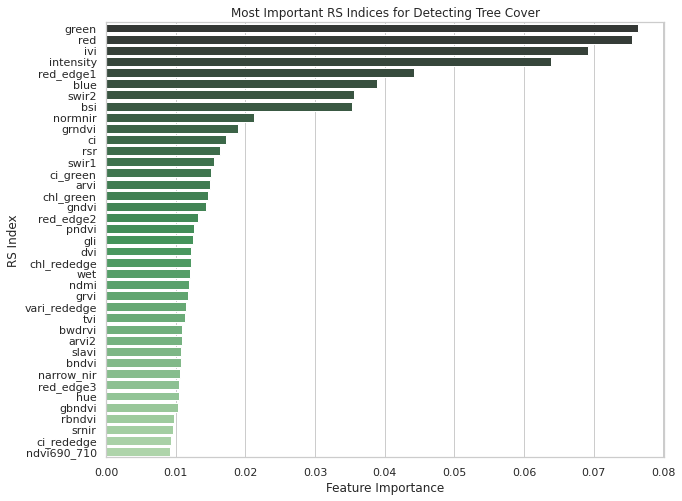

In [18]:
plt.figure(figsize = (10,8))

sns.barplot(fi_df['feature_importance'], fi_df['feature_names'], palette="Greens_d")

plt.title('Most Important RS Indices for Detecting Tree Cover')
plt.xlabel('Feature Importance')
plt.ylabel('RS Index');

### Sources
- Red edge: Lin, S.; Li, J.; Liu, Q.; Li, L.; Zhao, J.; Yu, W. Evaluating the Effectiveness of Using Vegetation Indices Based on Red-Edge Reflectance from Sentinel-2 to Estimate Gross Primary Productivity. Remote Sens. 2019, 11, 1303. https://doi.org/10.3390/rs11111303
- Sentinel 2 Remote Sensing Indices: https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/indexdb/
- Index DataBase: https://www.indexdatabase.de/db/ias.php

*Assumptions
- all indices that required specific nm were skipped (except [ndmi](https://www.indexdatabase.de/db/i-single.php?id=56)).
- all indices (~2) requiring band 9 and band 10 were skipped because these were not included in training data. 
- the values for variables (y, a, b, n, ar) were pulled from the index's basic information section on IDB. If not available, they were pulled from the [sentinel hub playground](https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/indexdb/). Overall, _b_ was interpreted as a variable whereas B was interpreted as Blue (band 2) with the exception of the index tsavi, where sentinel hub defines B = 0.421. 
- bare soil index (BSI) was not listed in IDB, so [this formula](https://giscrack.com/list-of-spectral-indices-for-sentinel-and-landsat/) was used.